### Objective- To predict the house price based on the given input variable.

In [2]:
#Importing the necessary library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


In [3]:
dataset=pd.read_excel("Linear Regression.xlsx")
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [23]:
max(dataset["price"])

7700000

In [6]:
dataset.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [7]:
dataset.shape

(21613, 5)

**Inference**
1. There are **21613** observation and **5** variable in the dataset.
2. There is no null value.

### Exploratory Data Analysis.


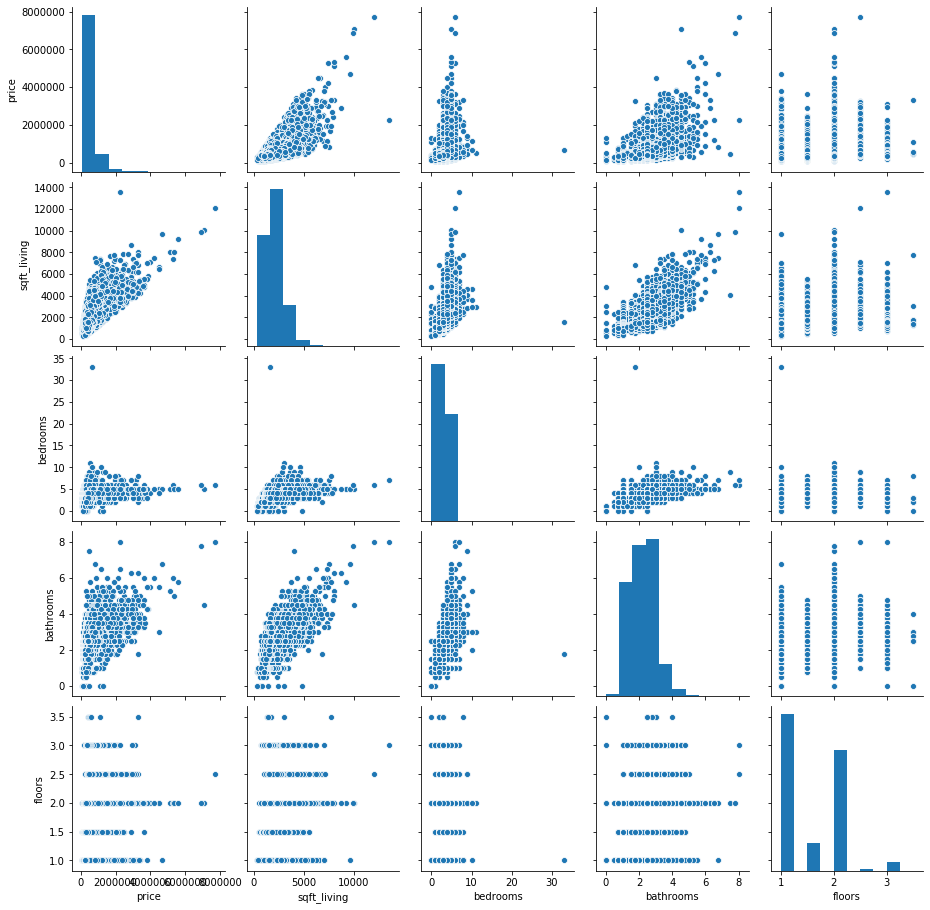

In [9]:
sn.pairplot(dataset)
plt.show();

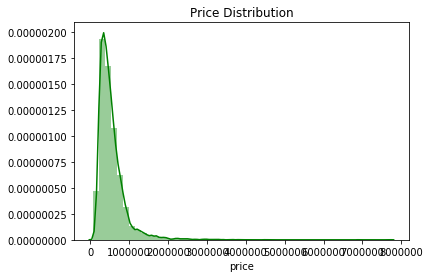

In [18]:
sn.distplot(dataset["price"],color="green")
plt.title("Price Distribution")
plt.show();

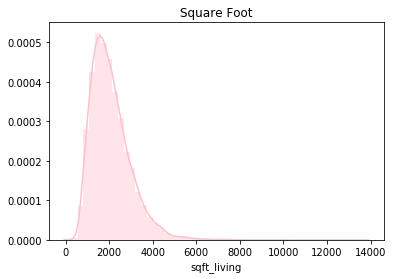

In [12]:
sn.distplot(dataset["sqft_living"],color="pink")
plt.title("Square Foot")
plt.show();

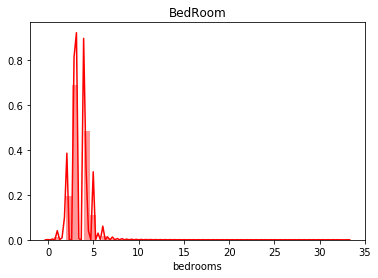

In [13]:
sn.distplot(dataset["bedrooms"],color="red")
plt.title("BedRoom")
plt.show();

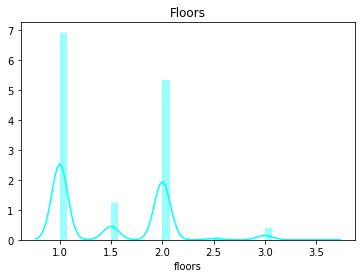

In [14]:
sn.distplot(dataset["floors"],color="cyan")
plt.title("Floors")
plt.show();

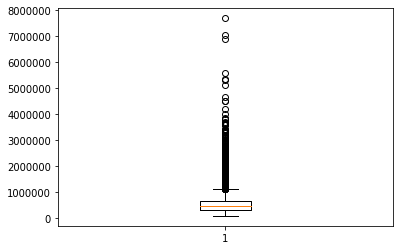

In [15]:
plt.boxplot(dataset["price"])
plt.show();

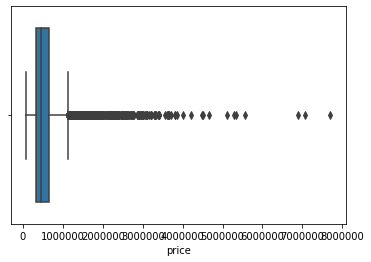

In [16]:
sn.boxplot(dataset["price"])
plt.show()

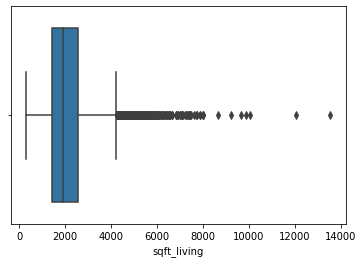

In [19]:
sn.boxplot(dataset["sqft_living"])
plt.show();

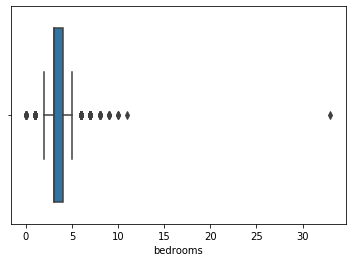

In [20]:
sn.boxplot(dataset["bedrooms"])
plt.show();

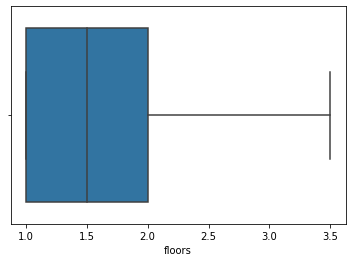

In [21]:
sn.boxplot(dataset["floors"])
plt.show();

In [30]:
#Filtering Or Removing the Outliers
q1=dataset['sqft_living'].quantile(0.25)
q3=dataset["sqft_living"].quantile(0.75)
Iq=q3-q1
lowsq=q1-1.5*Iq
higsq=q3+1.5*Iq
dataset=dataset.loc[(dataset["sqft_living"]>lowsq)&(dataset["sqft_living"]<higsq)]
dataset

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [34]:
#Remove outliers from Bedroom variable
bq1=dataset['bedrooms'].quantile(0.25)
bq3=dataset["bedrooms"].quantile(0.75)
biq=bq3-bq1
lowbd=q1-1.5*biq
higbd=q3-1.5*biq
dataset[(dataset["bedrooms"]>lowbd)&dataset["bedrooms"]<higbd]
dataset

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [37]:
#Removing Outliers From the Price Variable
pq1=dataset["price"].quantile(0.25)
pq3=dataset["price"].quantile(0.75)
piq=pq3=pq1
lowp=pq1-1.5*piq
highp=pq3+1.5*piq
dataset[(dataset["price"]>lowp)&dataset["price"]<highp]
dataset

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


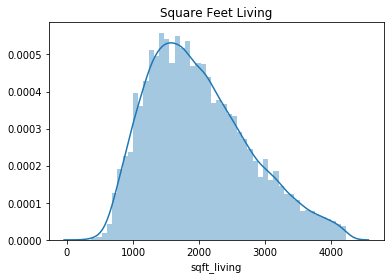

In [31]:
sn.distplot(dataset["sqft_living"])
plt.title("Square Feet Living")
plt.show();

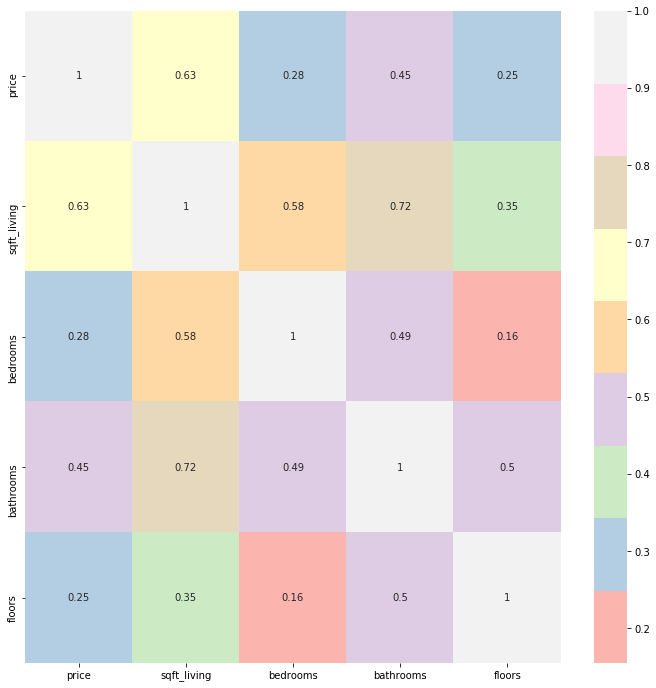

In [38]:
corrmat=dataset.corr()
top_feature=corrmat.index
plt.figure(figsize=(12,12))
p=sn.heatmap(dataset[top_feature].corr(),annot=True,cmap="Pastel1")

**Interpretation**
1. **Price** variable is **Right Skewed** and has outliers, with a maximum value of 77000.
2. **sqft_living** is **right Skewed** and has got outliers.
3. **Bedrooms** has got outliers
4. **floors** has got no outliers
5. There is a **strong correlation** of the price with the **sqft_living and bathrooms** variable and a **moderate correlation** between the **bedroom and floor**

### Based on the prediction building a Linear Regression model.

In [41]:
#Splitting the data
y=dataset.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [42]:
x=dataset.drop(["price"], axis=1)
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)


In [63]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression()
mul_reg.fit(x_train,y_train)
y_pred=mul_reg.predict(x_test)


#### Evaluation of the model

In [64]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R-square is", r2_score(y_test,y_pred))
print("The Root Mean Squared Error is", np.sqrt(mean_squared_error(y_test,y_pred)))

The R-square is 0.4155938624134381
The Root Mean Squared Error is 219421.50015509265


**Inferences**

1) R-square value is **0.41** suggesting that only about 41% or half of the variance in the target variable i.e. price can be explained by the independent variables area of living, number of bedrooms,number of bathrooms and number of floors.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).

**Not a good regression fit**